In [1]:
import numpy as np
import pandas as pd
import pyecharts as pe
import matplotlib.pyplot as plt


In [3]:
data2 = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/mobike_6-19_7-3/mobike_fast_73_utc.csv', names = None)
data2.head()

,0210125956,0210125956_3111527_12133462,31.1152741717505,121.334628950817,2017-6-22 07:40:39,2017-6-22 14:52:26,1
0,216510744,0216510744_3119302_12135127,31.193024,121.351276,2017-6-22 07:40:33,2017-6-22 07:40:33,1
1,216040928,0216040928_3115497_12134864,31.154979,121.348648,2017-6-22 07:40:36,2017-6-22 07:40:36,2
2,216040439,0216040439_3126342_12154057,31.263420,121.540571,2017-6-22 07:18:05,2017-6-22 07:40:38,2
3,216503594,0216503594_3121289_12152278,31.212896,121.522780,2017-6-25 00:26:17,2017-6-25 00:56:07,1
4,210074871,0210074871_3127076_12146792,31.270768,121.467924,2017-6-22 07:40:58,2017-6-22 07:40:58,1


In [81]:
data2.describe()

,0210125956,31.1152741717505,121.334628950817,1
count,2.877775e+07,2.877775e+07,2.877775e+07,2.877775e+07
mean,9.758651e+08,3.123697e+01,1.214717e+02,3.675736e+01
std,2.411285e+09,5.823448e-02,7.166706e-02,1.847923e+02
min,1.000407e+08,3.110781e+01,1.213251e+02,1.000000e+00
25%,2.160510e+08,3.119544e+01,1.214190e+02,1.000000e+00
50%,2.165516e+08,3.123774e+01,1.214704e+02,1.000000e+00
75%,2.167330e+08,3.127971e+01,1.215227e+02,2.000000e+00
max,8.716531e+09,3.137240e+01,1.216617e+02,9.990000e+02


In [4]:
data2 = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/mobike_6-19_7-3/mobike_fast_73_utc.csv', \
                    names = ['bid', 'lat', 'lng'], usecols = [0, 2, 3])
data2.duplicated().sum()
# day = pd.Series([int(d.split('-')[-1].split(' ')[0]) for d in data2.time])
# data2['day'] = day
# hour = pd.Series([int(h[-8:-6]) for h in data2.time])
# data2['hour'] = hour
# data2.head()

0

In [8]:
len(set(data2.bid))

422307

In [75]:
print(max(data2.lng), min(data2.lng), max(data2.lat), min(data2.lat))

121.661724557909 121.32505522224301 31.372404487095103 31.107806226554604


In [69]:
data2[data2.hour == 1].count()[0]

1675511

In [74]:
line = (
    pe.charts.Line()
    .add_xaxis(list(range(24)))
    .add_yaxis('记录数', [data2[data2.hour == x].count()[0]/14 for x in range(24)], is_symbol_show = False)
    .set_global_opts(
        title_opts=pe.options.TitleOpts(title="平均每日每个小时间隔数据量统计"),
    )
)
line.render_notebook()

In [1]:
data2.isnull().sum()

NameError: name 'data2' is not defined

In [12]:
print(max(data2.lat), min(data2.lat), max(data2.lng), min(data2.lng))
print(min(data2.time), max(data2.time))

31.372404487095103 31.107806226554604 121.661724557909 121.32505522224301
2017-6-18 16:11:09 2017-7-2 15:59:59


In [39]:
sample = data2[:5]
sample

,bid,lat,lng,time,geometry
0,210125956,31.115274,121.334629,2017-6-22 07:40:39,POINT (121.334628950817 31.1152741717505)
1,216510744,31.193024,121.351276,2017-6-22 07:40:33,POINT (121.351276305658 31.1930235978593)
2,216040928,31.154979,121.348648,2017-6-22 07:40:36,POINT (121.348648460998 31.1549786031044)
3,216040439,31.263420,121.540571,2017-6-22 07:18:05,POINT (121.54057103206 31.263420198073)
4,216503594,31.212896,121.522780,2017-6-25 00:26:17,POINT (121.522780264395 31.2128963515667)


In [60]:
d = pd.Series([int(x.split('-')[-1].split(' ')[0]) for x in data2.time])
data2['day'] = d

In [59]:
h = pd.Series([int(x[-8:-6]) for x in sample.time])
sample['hour'] = h
sample

/Users/valarian/python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,bid,lat,lng,time,geometry,day,hour
0,210125956,31.115274,121.334629,2017-6-22 07:40:39,POINT (121.334628950817 31.1152741717505),22,7
1,216510744,31.193024,121.351276,2017-6-22 07:40:33,POINT (121.351276305658 31.1930235978593),22,7
2,216040928,31.154979,121.348648,2017-6-22 07:40:36,POINT (121.348648460998 31.1549786031044),22,7
3,216040439,31.263420,121.540571,2017-6-22 07:18:05,POINT (121.54057103206 31.263420198073),22,7
4,216503594,31.212896,121.522780,2017-6-25 00:26:17,POINT (121.522780264395 31.2128963515667),25,0


In [ ]:
data2.drop(['geometry'], axis =1)

In [14]:
data2.describe()

,bid,lat,lng
count,2.877775e+07,2.877775e+07,2.877775e+07
mean,9.758651e+08,3.123697e+01,1.214717e+02
std,2.411285e+09,5.823448e-02,7.166706e-02
min,1.000407e+08,3.110781e+01,1.213251e+02
25%,2.160510e+08,3.119544e+01,1.214190e+02
50%,2.165516e+08,3.123774e+01,1.214704e+02
75%,2.167330e+08,3.127971e+01,1.215227e+02
max,8.716531e+09,3.137240e+01,1.216617e+02


In [ ]:
#按id统计
id_df = data2.groupby('bid')


In [11]:
id_df.size().head()

bid
100040745     25
106094970    181
200010028    144
200010138    111
200010245     74
dtype: int64

In [ ]:
id_df.mean()

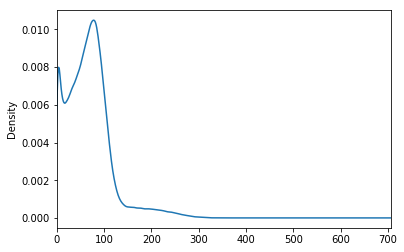

In [6]:
df = pd.DataFrame(id_dataFrame)
df.plot(kind = 'kde', xlim = (0,max(id_dataFrame)), legend = False)

No handles with labels found to put in legend.


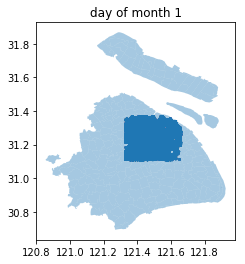

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline
city_map = gpd.read_file('/Users/valarian/SJTU/SJTU/Data/shanghaitown/shanghaitown.shp')
geometry = [Point(xy) for xy in zip(data2.lng, data2.lat)]
geo_df = gpd.GeoDataFrame(data2, geometry = geometry)
#fig, ax = plt.subplots(10,3,figsize = (15,60))
days = set(geo_df['day'])
for i in days:
    fig, ax = plt.subplots(1,1,figsize = (4,4))
    city_map.plot(ax = ax, alpha = 0.4)#, alpha = 0.4, color = 'grey')
    geo_df[geo_df['day'] == i].plot(ax =ax, markersize = 0.2)
    ax.set_title('day of month '+str(i))
    plt.savefig('./mobike/eachday' + str(i) +'.png')

# city_map.plot(ax = ax[i], alpha = 0.4)#, alpha = 0.4, color = 'grey')
# geo_df[geo_df['hour'] == i].plot(ax =ax[i], markersize = 0.2)
# ax[i].set_title(i+1)

plt.legend(prop={'size':15})